# Lab - 2

Name: Purusharth Malik

Registration No.: 2348542

### Implement a descriptive Question answering System (Like ChatGPT/Gemini) using NLG by utilizing the LLM Models (any foundation model can use).

In [45]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

# Loading the model and the tokenizer
model_name = "mistralai/Mistral-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.pad_token = "<pad>"
quantization_config = BitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.bfloat16)
model = AutoModelForCausalLM.from_pretrained(model_name, 
                                             device_map="cuda", 
                                             quantization_config=quantization_config,
                                             low_cpu_mem_usage=True)

# Function that takes in the context and the question to generate the answer
def generation(question, context):
    # Define the stop token
    prompt = f"Context: {context}\n\nQuestion: {question}\n\nAnswer:"
    # Creating input ids
    inputs = tokenizer(prompt, return_tensors="pt")
    inputs.to('cuda')
    # Generating output
    outputs = model.generate(inputs["input_ids"], 
                             max_length=512, 
                             num_return_sequences=1,
                             pad_token_id=tokenizer.pad_token_id)
    # Decoding the output
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer.split('Answer:')[1].split('Question:')[0]

# Creating context regarding Christ University
context = """
Christ University, located in Bangalore, India, is a prestigious institution offering a variety of undergraduate, postgraduate, and doctoral programs. Established in 1969, it is known for its strong emphasis on academic excellence, holistic education, and the overall development of students. The university has state-of-the-art infrastructure, experienced faculty, and vibrant campus life. It offers programs in fields such as science, arts, commerce, engineering, management, law, and social sciences.
"""

# Generating answers for the following questions
questions = [
    "When was Christ University established?",
    "What types of programs does Christ University offer?",
    "What is Christ University known for?",
    "Describe the campus life at Christ University."
]

for question in questions:
    print(f"Question: {question}")
    print(f"Answer: {generation(question, context)}\n")


Question: When was Christ University established?
Answer:  Christ University was established in 1969.




Question: What types of programs does Christ University offer?
Answer:  Christ University offers a wide range of undergraduate, postgraduate, and doctoral programs in various fields such as science, arts, commerce, engineering, management, law, and social sciences.




Question: What is Christ University known for?
Answer:  Christ University is known for its academic excellence, holistic education, and the overall development of students. It offers a wide range of undergraduate, postgraduate, and doctoral programs in fields such as science, arts, commerce, engineering, management, law, and social sciences. The university has state-of-the-art infrastructure, experienced faculty, and vibrant campus life.




Question: Describe the campus life at Christ University.
Answer: 
Campus life at Christ University is vibrant and dynamic, offering a range of opportunities for students to enga

### Enter any 3 the same prompt in your model, Gemini and ChatGPT and retrieve the answer and upload. Understand the difference of prompt in each model (as shown the following Gemini and ChatGPT).

ChatGPT:
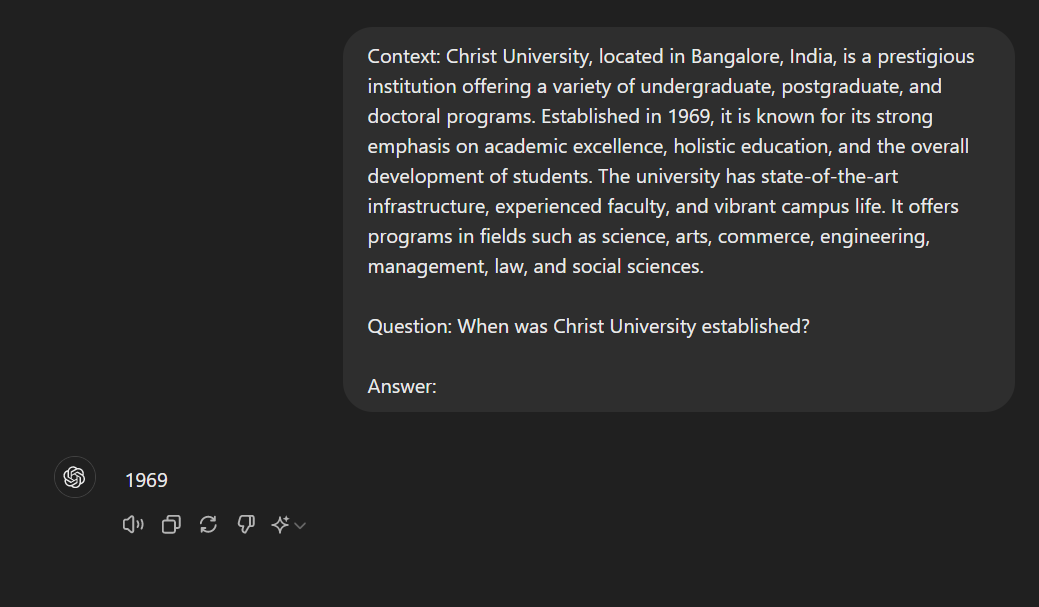
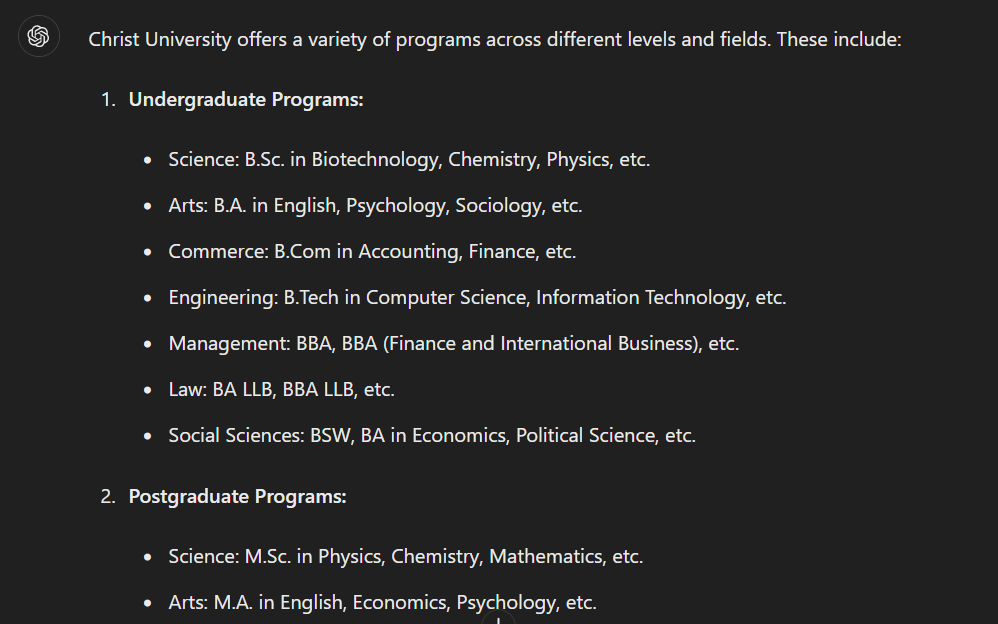


Gemini:
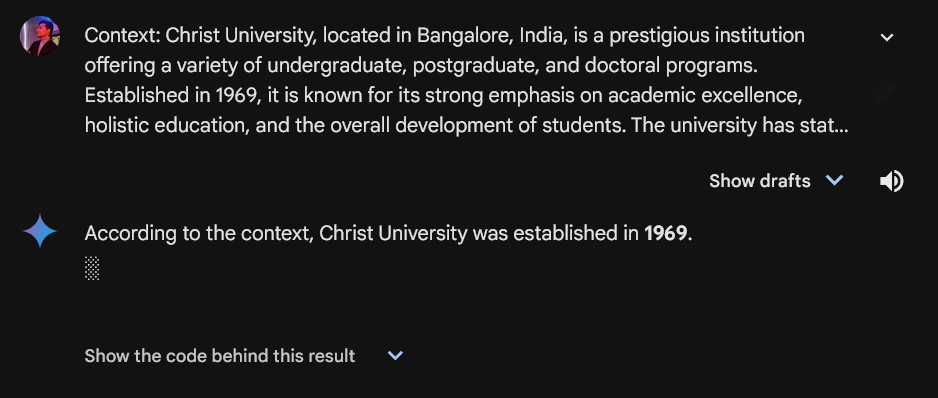
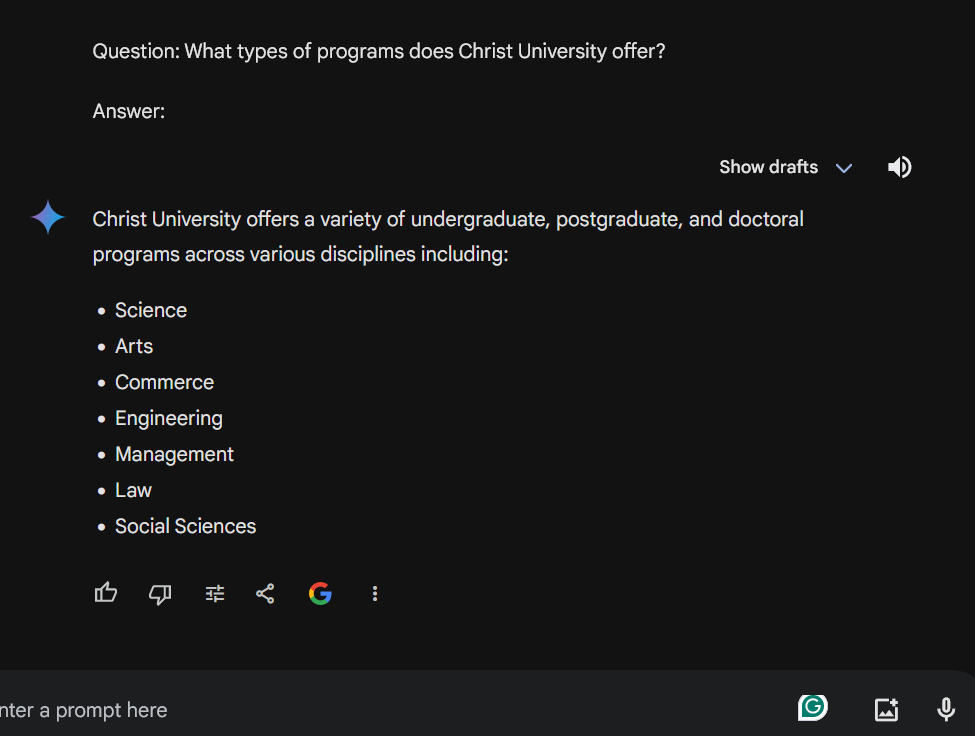

Inference: Even after giving the same context, GPT-4o is able to use its world knowledge that it learned during pre-training to give more detailed and accurate answers than our model or Gemini-1.5 Pro.

# End